In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\USER\Desktop\ALL MY TASKS\TSI DATA SCIENCE\Datasets\CSV Datasets\spam_ham_dataset.csv")
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [2]:
import string #for string manipulation
import numpy as np
import nltk #for natural language processing
from nltk.corpus import stopwords # Getting rid of stopwords that are part of email
from nltk.stem.porter import PorterStemmer #

from sklearn.feature_extraction.text import CountVectorizer #individual tokens into numerical representation of the email
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [3]:
df1 = pd.read_csv(r"C:\Users\USER\Desktop\ALL MY TASKS\TSI DATA SCIENCE\Datasets\CSV Datasets\spam_ham_dataset.csv")
df1.text.iloc[0] 

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [4]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df1["text"] = df["text"].apply(lambda x: x.replace('\r\n',' '))


In [6]:
df1.text.iloc[0] 

"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."

In [7]:
df["text"] = df["text"].apply(lambda x: x.replace('\r\n',' '))

In [8]:
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291 thi...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001 ( see at...",0
2,3624,ham,"Subject: neon retreat ho ho ho , we ' re aroun...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs this deal is to b...,0
5,2949,ham,Subject: ehronline web address change this mes...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26 we agre...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000 ...",0


In [9]:
df.groupby('label').describe()

Unnamed: 0                                                         \
           count    mean          std     min      25%     50%      75%   
label                                                                     
ham       3672.0  1835.5  1060.159422     0.0   917.75  1835.5  2753.25   
spam      1499.0  4421.0   432.868340  3672.0  4046.50  4421.0  4795.50   

              label_num                                     
          max     count mean  std  min  25%  50%  75%  max  
label                                                       
ham    3671.0    3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
spam   5170.0    1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [10]:
for i in range(5):
    print(i)

0
1
2
3
4


In [11]:
df.shape

(5171, 4)

In [12]:
df['spam'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)
df.head(2)

,Unnamed: 0,label,text,label_num,spam
0,605,ham,Subject: enron methanol ; meter # : 988291 thi...,0,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001 ( see at...",0,0


In [13]:
df.text.iloc[0] 

"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."

In [14]:
df.text.iloc[2] 

"Subject: neon retreat ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time ! i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute . on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about . i think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a pote

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
 4   spam        5171 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 202.1+ KB


In [16]:
#preprocessing -- removing all the punctuations and changing to lowercases

In [17]:
stemmer = PorterStemmer()
corpus = []

stopwords_set = set(stopwords.words('english'))

for i in range(len(df)):
    text = df['text'].iloc[i].lower()
    text = text.translate(str.maketrans('','',string.punctuation)).split()
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    text = ' '.join(text)
    corpus.append(text)

In [18]:
print("Before cleaning \n")
print(df['text'][1])
print("-----------------")
print("After cleaning \n")

print(corpus[1])

Before cleaning 

Subject: hpl nom for january 9 , 2001 ( see attached file : hplnol 09 . xls ) - hplnol 09 . xls
-----------------
After cleaning 

subject hpl nom januari 9 2001 see attach file hplnol 09 xl hplnol 09 xl


In [19]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus).toarray()
y = df.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
#train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
#Testing the model
print("Accuracy: \n")
print(model.score(X_test, y_test))
print("The accuracy of 97% to justify our model fit; we can go ahead and deploy the model")

Accuracy: 

0.9816425120772947
The accuracy of 97% to justify our model fit; we can go ahead and deploy the model


In [22]:
#Our own validation
email_ham = ['Hey, Jesse! Wanna meet up for the game?']
email_ham = vectorizer.transform(email_ham)

In [23]:
model.predict(email_ham)

array([1], dtype=int64)

In [24]:
#Oupss! It is a spam

In [25]:
email = ['Click here win $20,000']
email = vectorizer.transform(email)
model.predict(email)

array([1], dtype=int64)

In [26]:
email_2 = ["Dear Joseph, kindly follow up on the data science notes before we do our exams"]
email_2 = vectorizer.transform(email_2)
model.predict(email_2)

array([0], dtype=int64)

In [28]:
y_pred = model.predict(X_test)

# Print true and predicted values
for true, pred in zip(y_test, y_pred):
    print(f"True: {true}, Predicted: {pred}")

True: 0, Predicted: 0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 1
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 0, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, P

Accuracy: 0.9816425120772947
Precision: 0.96
Recall: 0.976271186440678
AUC: 0.9940769583142464
Confusion Matrix:
[[728  12]
 [  7 288]]


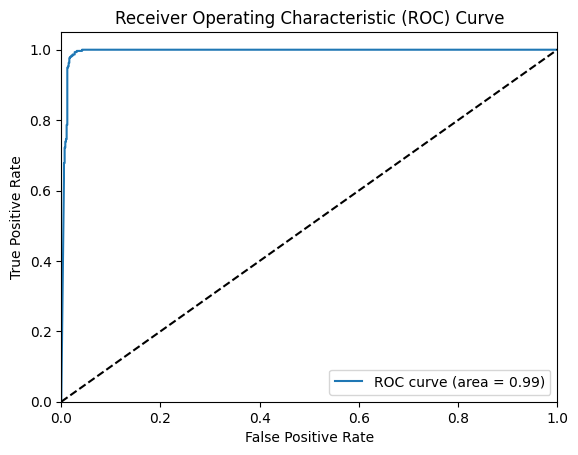

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Adjust 'average' if needed
recall = recall_score(y_test, y_pred, average='binary')        # Adjust 'average' if needed
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {roc_auc}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [30]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[728  12]
 [  7 288]]


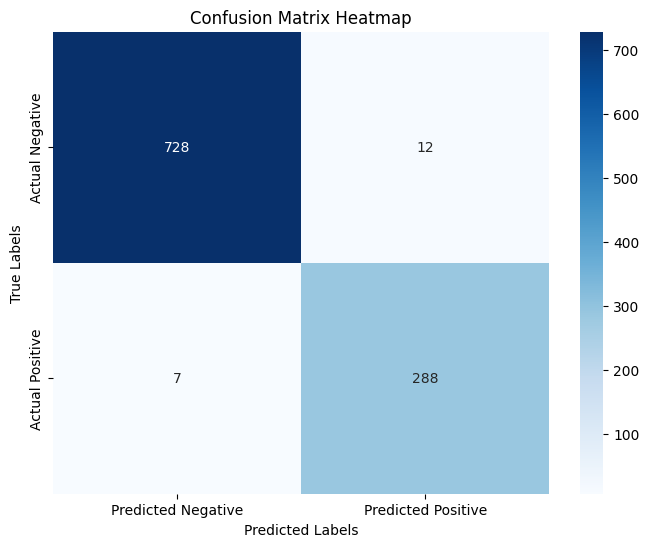

In [31]:
import seaborn as sns
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [32]:
import pickle

# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)
